
본 과제에서는 Loan Prediction Problem Dataset를 활용하여, Loan_Status 여부를 예측합니다.

https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset


EDA와 적절한 Data pre-processing을 진행하고, 정제된 데이터를 바탕으로 가장 높은 성능의 예측 모델(분류기)를 만드는 것이 목표입니다.

사용 라이브러리 및 코드 분량에 대한 제약이 없으므로, 필요에 따라 코드 스니펫을 추가하여 수행하세요.

#1. Data pre-processing & EDA

**Main Goal : 모델 학습 전 데이터 전처리 및 분석**

**Sub Goals : 모델 학습 및 평가에 필요한 데이터를 전처리합니다.**
1. Types of Variables

2. Data Quality

3. Data Transformation

4. Graphical Summary

4. Data pre-processing에서 모든 feature를 사용해야 합니다.(임의의 feature를 drop하지 마세요.)

Columns(variable) Description
HW에서 활용할 데이터셋(student performance)의 변수 설명입니다.

| **열 이름 (Column)**    | **설명 (Description)**                               |
| -------------------- | -------------------------------------------------- |
| `Loan_ID`            | 고유한 대출 ID (A unique loan ID)                       |
| `Gender`             | 성별 (Male/Female)                                   |
| `Married`            | 혼인 여부 (Yes: 결혼함 / No: 미혼)                          |
| `Dependents`         | 부양가족 수 (Number of persons depending on the client) |
| `Education`          | 학력 (Graduate / Undergraduate)                      |
| `Self_Employed`      | 자영업 여부 (Yes/No)                                    |
| `ApplicantIncome`    | 신청자 소득                                             |
| `Coapplicant income` | 공동 신청자 소득                                          |
| `LoanAmount`         | 대출 금액 (단위: 천 단위)                                   |
| `Loan_Amount_Term`   | 대출 상환 기간 (개월 수)                                    |
| `Credit_Hostory`     | 신용 이력 적합 여부 (meets guidelines)                     |
| `Property_Area`      | 지역 유형 (Urban / Semiurban / Rural)                  |
| `Loan_Status`        | 대출 승인 여부 (Y: 승인, N: 거절)                            |


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MachineLearningWithMath/archive/train_loanPredictioin.csv") # 구글 드라이브에 데이터셋(csv)을 업로드한 후, 경로를 지정해주세요.

### 1. Types of Variables
과제에서 활용할 Loan Prediction Problem Dataset 데이터셋이 어떤 데이터로 구성되었는지 확인한 후, 각 데이터 타입을 정의합니다. (보고서에 작성)
e.g) nominal, ordinal, discrete, continuous


In [ ]:
# 데이터프레임을 출력하여 확인하기
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# Credit_History??
df['Credit_History'].value_counts()

,count
Credit_History,
1.0,475
0.0,89


### 2. Data Quality

* 모델 학습에 활용할 데이터 품질을 높이기 위하여 전처리를 진행합니다.
* 1. 중복 데이터 처리 (duplicated sample)
* 2. 누락 데이터 처리 (missing value), **KNN Imputator 활용**
* 3. 이상치 (outlier) 처리
* *필요시 데이터 처리 순서 변경해도 무관합니다.*

In [ ]:
# 기본적인 통계 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### 1) 중복 데이터 처리

In [ ]:
# 중복 데이터 처리

## 1) Loan_ID의 값이 같은 행이 존재하는경우 중복 제거
df_no_dup = df.drop_duplicates('Loan_ID')
df_no_dup

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
## 2) Loan_ID 제외하고 모든 값이 같은 경우 중복 제거
cols_except_Loan_ID = [col for col in df.columns if col != 'Loan_ID']
df_no_dup = df_no_dup.drop_duplicates(subset=cols_except_Loan_ID, ignore_index=True)
df_no_dup

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### 2) 누락 데이터 처리

In [ ]:
# 누락 데이터 처리

## 결측값 개수 확인
df_no_dup.isnull().sum(axis=0)

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
## 1) 수치형 fueature인 'LoanAmount', 'Loan_Amount_Term'부터 kNN Imputer로 채워넣기

### kNN Imputer 불러오고 k = 5로 hyper-parameter 설정
from sklearn.impute import KNNImputer
myImputer = KNNImputer(n_neighbors=5)

### 결측값 채우기
df_no_missing = df_no_dup
df_no_missing[['LoanAmount', 'Loan_Amount_Term']] = myImputer.fit_transform(df_no_missing[['LoanAmount', 'Loan_Amount_Term']])

In [ ]:
### 1) 작업 잘 됐는지 확인
df_no_missing.isnull().sum(axis=0)

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
## 2) Credit_History는 kNN Imputer 적용 후 반올림해서 0, 1만 갖도록 채우기
df_no_missing['Credit_History'] = myImputer.fit_transform(df_no_missing[['Credit_History']]).round()

In [ ]:
### 2) 작업 잘 됐는지 확인
df_no_missing.isnull().sum(axis=0)

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
## 3) Married 열에 결측치 3개 -> 삭제
df_no_missing = df_no_missing.dropna(subset=['Married'])

In [ ]:
### 3) 작업 잘 됐는지 확인 -> 범주형인 Gender, Dependents, Self_Employed 만 남음.
df_no_missing.isnull().sum(axis=0)

,0
Loan_ID,0
Gender,13
Married,0
Dependents,12
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
## 4) Gender 결측치 13개, Dependents 결측치 12개 -> 최빈값으로 대체
df_no_missing.loc[:, 'Gender'] = df_no_missing['Gender'].fillna(df_no_missing['Gender'].mode()[0])
df_no_missing.loc[:, 'Dependents'] = df_no_missing['Dependents'].fillna(df_no_missing['Dependents'].mode()[0])

In [ ]:
### 4) 작업 잘 됐는지 확인
df_no_missing.isnull().sum(axis=0)

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
## 5) Self_Employed
### <1> Label Encoding
df_no_missing.loc[:, 'Self_Employed'] = df_no_missing['Self_Employed'].map({'Yes':1, 'No':0})

In [ ]:
### <2> kNN Imputer로 결측값 전부 채우기
df_no_missing.loc[:, 'Self_Employed'] = myImputer.fit_transform(df_no_missing[['Self_Employed']]).round()

In [ ]:
### 6) 잘 됐는지 확인: 결측치 남아있는지 확인 -> 없음
df_no_missing.isnull().sum(axis=0)

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
# index 재설정
df_no_missing = df_no_missing.reset_index(drop=True)
df_no_missing

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,0.0,5849,0.0,104.6,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,LP002978,Female,No,0,Graduate,0.0,2900,0.0,71.0,360.0,1.0,Rural,Y
607,LP002979,Male,Yes,3+,Graduate,0.0,4106,0.0,40.0,180.0,1.0,Rural,Y
608,LP002983,Male,Yes,1,Graduate,0.0,8072,240.0,253.0,360.0,1.0,Urban,Y
609,LP002984,Male,Yes,2,Graduate,0.0,7583,0.0,187.0,360.0,1.0,Urban,Y


#### 3) 이상치 처리

In [ ]:
# 이상치 처리

## 1) IQR(Interquartile Range) 함수 -> 이상치가 너무 많아짐

def outliers_by_IQR(data):
  Q1, Q3 = np.percentile(data, [25, 75])
  IQR = Q3 - Q1
  lower_limit = Q1 - (1.5 * IQR)
  upper_limit = Q3 + (1.5 * IQR)
  #print(lower_limit)
  #print(upper_limit)
  return np.where((data < lower_limit) | (data > upper_limit))[0]

### test
print(df_no_missing['LoanAmount'].iloc[outliers_by_IQR(df_no_missing['LoanAmount'])].shape)

(41,)


In [ ]:
## 2) Z-score 함수

def outliers_by_Zscore(data):
  lower_limit = data.mean() - 3 * data.std()
  upper_limit = data.mean() + 3 * data.std()
  #print(lower_limit)
  #print(upper_limit)
  return np.where((data < lower_limit) | (data > upper_limit))[0]

### test
print(df_no_missing['LoanAmount'].iloc[outliers_by_Zscore(df_no_missing['LoanAmount'])].shape)

(15,)


In [ ]:
# 각각의 양적변수 이상치 처리(삭제)
df_no_outlier = df_no_missing.drop(outliers_by_Zscore(df_no_missing['ApplicantIncome']))
df_no_outlier = df_no_outlier.reset_index(drop=True)
df_no_outlier = df_no_outlier.drop(outliers_by_Zscore(df_no_outlier['CoapplicantIncome']))
df_no_outlier = df_no_outlier.reset_index(drop=True)
df_no_outlier = df_no_outlier.drop(outliers_by_Zscore(df_no_outlier['LoanAmount']))
df_no_outlier = df_no_outlier.reset_index(drop=True)
df_no_outlier = df_no_outlier.drop(outliers_by_Zscore(df_no_outlier['Loan_Amount_Term']))
df_no_outlier = df_no_outlier.reset_index(drop=True)

In [ ]:
df_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            572 non-null    object 
 1   Gender             572 non-null    object 
 2   Married            572 non-null    object 
 3   Dependents         572 non-null    object 
 4   Education          572 non-null    object 
 5   Self_Employed      572 non-null    object 
 6   ApplicantIncome    572 non-null    int64  
 7   CoapplicantIncome  572 non-null    float64
 8   LoanAmount         572 non-null    float64
 9   Loan_Amount_Term   572 non-null    float64
 10  Credit_History     572 non-null    float64
 11  Property_Area      572 non-null    object 
 12  Loan_Status        572 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 58.2+ KB


### 3. Data Transformation

* 모델 학습을 위하여 student performance 데이터셋을 모두 수치형 데이터으로 변환합니다.
* 변경해야하는 모든 feature들을 선택하고 적절히 변환하시오.
* 해당 선택된 feature들과 선택 이유 변환 방법 등을 근거를 보고서에 상세히 기술합니다.

In [ ]:
df_preprocessed = df_no_outlier

In [ ]:
# 1) Loan_ID -> 순서(시간)으로 생각할 수 있음

## <1> LP00xxxx 에서 LP 제거
df_preprocessed['Loan_ID'] = df_preprocessed['Loan_ID'].str.replace('LP', '', regex=False)

## <2> Datatype int로 변경
df_preprocessed['Loan_ID'] = df_preprocessed['Loan_ID'].astype(int)

### 확인
print(df_preprocessed.info())
print(df_preprocessed['Loan_ID'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            572 non-null    int64  
 1   Gender             572 non-null    object 
 2   Married            572 non-null    object 
 3   Dependents         572 non-null    object 
 4   Education          572 non-null    object 
 5   Self_Employed      572 non-null    object 
 6   ApplicantIncome    572 non-null    int64  
 7   CoapplicantIncome  572 non-null    float64
 8   LoanAmount         572 non-null    float64
 9   Loan_Amount_Term   572 non-null    float64
 10  Credit_History     572 non-null    float64
 11  Property_Area      572 non-null    object 
 12  Loan_Status        572 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 58.2+ KB
None
0      1002
1      1003
2      1005
3      1006
4      1008
       ... 
567    2978
568    2979
569    2983

In [ ]:
# 2) Gender, Married, Self_Employed, Property_Area -> One-hot encoding
df_preprocessed = pd.get_dummies(df_preprocessed, columns=['Gender', 'Married', 'Self_Employed', 'Property_Area'], prefix=['Gender', 'Married', 'Self_Employed', 'Property_Area'])

df_preprocessed.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_0.0,Self_Employed_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1002,0,Graduate,5849,0.0,104.6,360.0,1.0,Y,False,True,True,False,True,False,False,False,True
1,1003,1,Graduate,4583,1508.0,128.0,360.0,1.0,N,False,True,False,True,True,False,True,False,False
2,1005,0,Graduate,3000,0.0,66.0,360.0,1.0,Y,False,True,False,True,False,True,False,False,True
3,1006,0,Not Graduate,2583,2358.0,120.0,360.0,1.0,Y,False,True,False,True,True,False,False,False,True
4,1008,0,Graduate,6000,0.0,141.0,360.0,1.0,Y,False,True,True,False,True,False,False,False,True


In [ ]:
### Self_Employed_0.0/1.0 -> Self_Employed_No/Yes (보기편하게)
df_preprocessed = df_preprocessed.rename(columns={'Self_Employed_0.0': 'Self_Employed_No', 'Self_Employed_1.0': 'Self_Employed_Yes'})

In [ ]:
### (2)확인
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  572 non-null    int64  
 1   Dependents               572 non-null    object 
 2   Education                572 non-null    object 
 3   ApplicantIncome          572 non-null    int64  
 4   CoapplicantIncome        572 non-null    float64
 5   LoanAmount               572 non-null    float64
 6   Loan_Amount_Term         572 non-null    float64
 7   Credit_History           572 non-null    float64
 8   Loan_Status              572 non-null    object 
 9   Gender_Female            572 non-null    bool   
 10  Gender_Male              572 non-null    bool   
 11  Married_No               572 non-null    bool   
 12  Married_Yes              572 non-null    bool   
 13  Self_Employed_No         572 non-null    bool   
 14  Self_Employed_Yes        5

In [ ]:
# 3) Dependents, Education -> Label Encoding

## <1> Dependents: 3+를 3으로 변경 후 Data type int로 변경
df_preprocessed['Dependents'] = df_preprocessed['Dependents'].str.replace('3+', '3', regex=False)
df_preprocessed['Dependents'] = df_preprocessed['Dependents'].astype(int)

## <2> Education: Not Graduate -> 0 / Graduate -> 1
df_preprocessed['Education'] = df_preprocessed['Education'].map({'Not Graduate': 0, 'Graduate': 1})

df_preprocessed.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1002,0,1,5849,0.0,104.6,360.0,1.0,Y,False,True,True,False,True,False,False,False,True
1,1003,1,1,4583,1508.0,128.0,360.0,1.0,N,False,True,False,True,True,False,True,False,False
2,1005,0,1,3000,0.0,66.0,360.0,1.0,Y,False,True,False,True,False,True,False,False,True
3,1006,0,0,2583,2358.0,120.0,360.0,1.0,Y,False,True,False,True,True,False,False,False,True
4,1008,0,1,6000,0.0,141.0,360.0,1.0,Y,False,True,True,False,True,False,False,False,True


In [ ]:
### (3) 확인
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  572 non-null    int64  
 1   Dependents               572 non-null    int64  
 2   Education                572 non-null    int64  
 3   ApplicantIncome          572 non-null    int64  
 4   CoapplicantIncome        572 non-null    float64
 5   LoanAmount               572 non-null    float64
 6   Loan_Amount_Term         572 non-null    float64
 7   Credit_History           572 non-null    float64
 8   Loan_Status              572 non-null    object 
 9   Gender_Female            572 non-null    bool   
 10  Gender_Male              572 non-null    bool   
 11  Married_No               572 non-null    bool   
 12  Married_Yes              572 non-null    bool   
 13  Self_Employed_No         572 non-null    bool   
 14  Self_Employed_Yes        5

In [ ]:
# 4) Loan_Status : 0 / 1로 변환하고 젤 뒤로 보내기
df_preprocessed['Loan_Status'] = df_preprocessed['Loan_Status'].map({'Y': 1, 'N': 0})
df_preprocessed = df_preprocessed[[col for col in df_preprocessed.columns if col != 'Loan_Status'] + ['Loan_Status']]

df_preprocessed

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,1002,0,1,5849,0.0,104.6,360.0,1.0,False,True,True,False,True,False,False,False,True,1
1,1003,1,1,4583,1508.0,128.0,360.0,1.0,False,True,False,True,True,False,True,False,False,0
2,1005,0,1,3000,0.0,66.0,360.0,1.0,False,True,False,True,False,True,False,False,True,1
3,1006,0,0,2583,2358.0,120.0,360.0,1.0,False,True,False,True,True,False,False,False,True,1
4,1008,0,1,6000,0.0,141.0,360.0,1.0,False,True,True,False,True,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,2978,0,1,2900,0.0,71.0,360.0,1.0,True,False,True,False,True,False,True,False,False,1
568,2979,3,1,4106,0.0,40.0,180.0,1.0,False,True,False,True,True,False,True,False,False,1
569,2983,1,1,8072,240.0,253.0,360.0,1.0,False,True,False,True,True,False,False,False,True,1
570,2984,2,1,7583,0.0,187.0,360.0,1.0,False,True,False,True,True,False,False,False,True,1


In [ ]:
### (4) 확인
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  572 non-null    int64  
 1   Dependents               572 non-null    int64  
 2   Education                572 non-null    int64  
 3   ApplicantIncome          572 non-null    int64  
 4   CoapplicantIncome        572 non-null    float64
 5   LoanAmount               572 non-null    float64
 6   Loan_Amount_Term         572 non-null    float64
 7   Credit_History           572 non-null    float64
 8   Gender_Female            572 non-null    bool   
 9   Gender_Male              572 non-null    bool   
 10  Married_No               572 non-null    bool   
 11  Married_Yes              572 non-null    bool   
 12  Self_Employed_No         572 non-null    bool   
 13  Self_Employed_Yes        572 non-null    bool   
 14  Property_Area_Rural      5

### 4. Graphical Summary

* 대출 승인 여부를 예측하기 위해 데이터를 시각화하여 분석합니다.
* 상관 관계, 비교 분석 등 시각화와 함께 최소 2가지 이상 진행하세요 (Barcharts, Scatter Plot, Histograms, Heatmap 중 최소 2개 활용).
* 어떤 feature가 승인과 거절 예측에 도움이 될 수 있을지를 고려하여 분석하시오.
* 분석한 결과에 대하여 보고서에 상세히 기술하세요.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

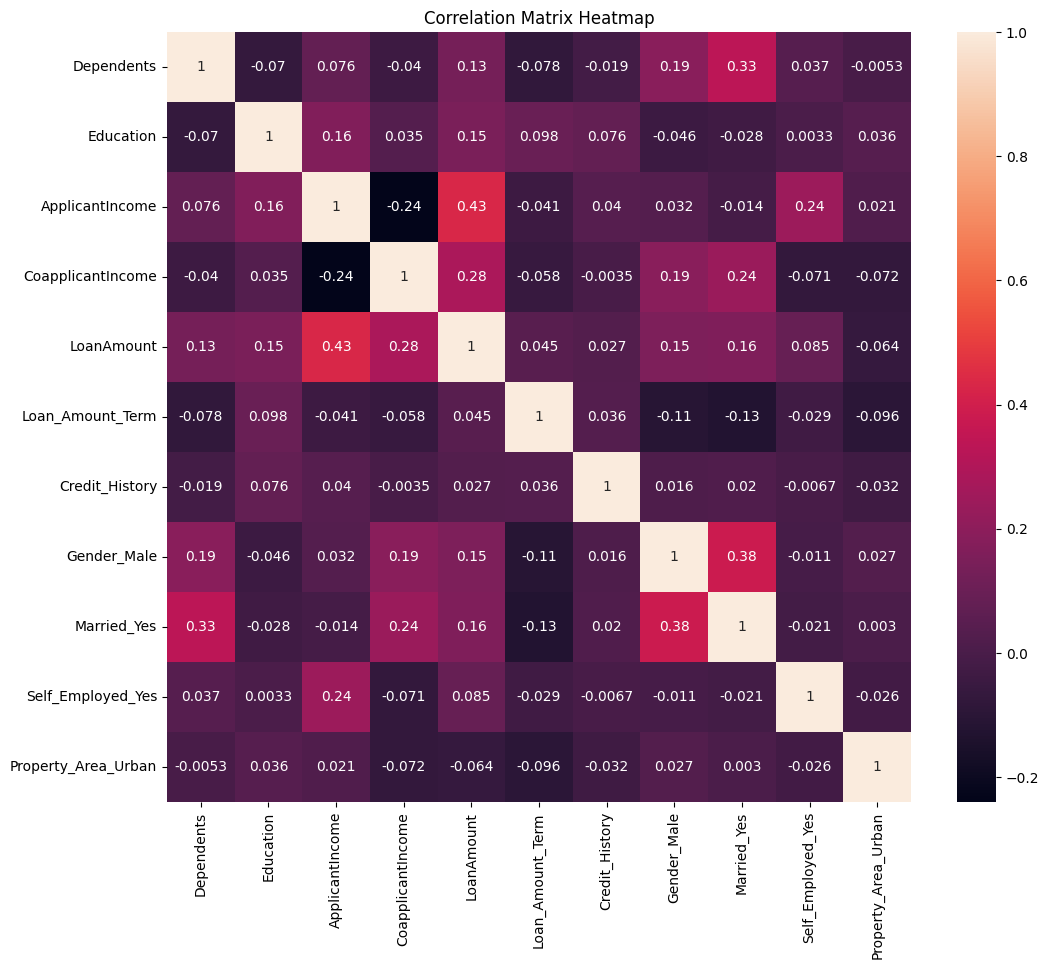

In [ ]:
# 상관관계 분석

## 상관계수 행렬에 포함시킬 feature 선택
df_for_correlation = df_preprocessed.drop(['Loan_ID', 'Gender_Female', 'Married_No', 'Loan_Status','Property_Area_Rural', 'Property_Area_Semiurban', 'Self_Employed_No'], axis=1)

## Correlation Matrix
corr_matrix = df_for_correlation.corr()

## 1) Features(독립변수)간의 Correlation Matrix Heatmap
fig = plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix Heatmap')
plt.show()

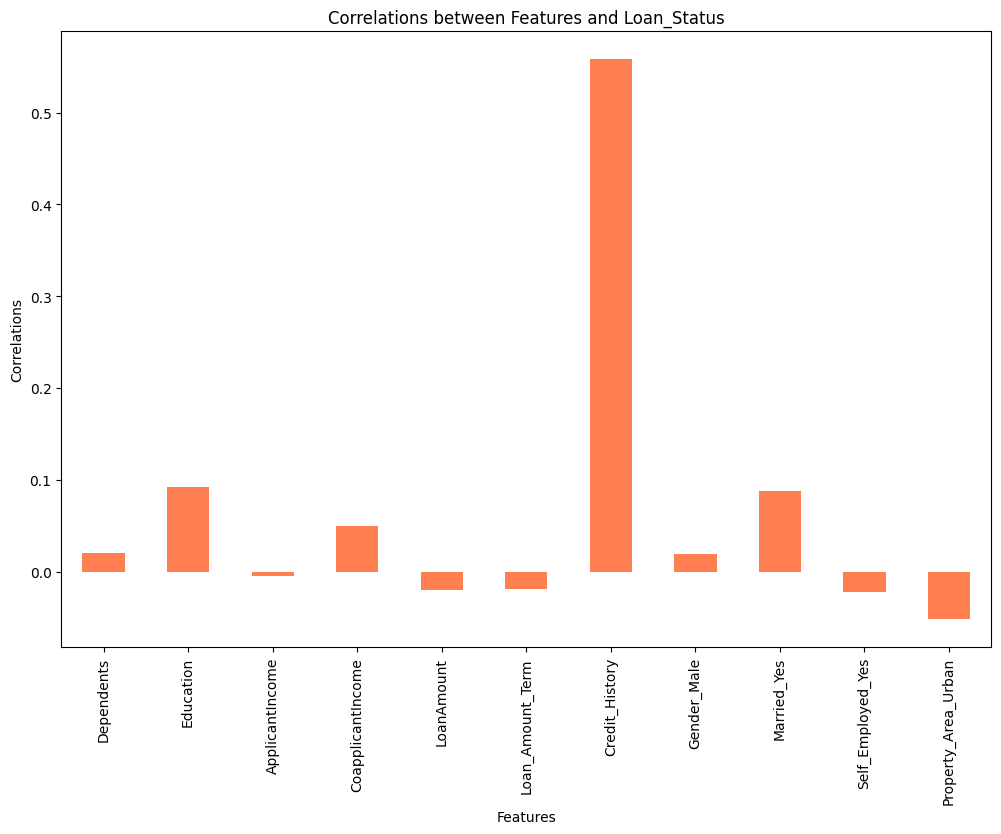

In [ ]:
## 2) 각 feature들과 Loan_Status(종속변수)의 correlation
corr_Loan_Status = df_for_correlation.corrwith(df_preprocessed['Loan_Status'])

fig = plt.figure(figsize=(12, 8))
corr_Loan_Status.plot(kind='bar', color='coral')
plt.xlabel('Features')
plt.ylabel('Correlations')
plt.title('Correlations between Features and Loan_Status')
plt.show()

### 5. 전처리된 데이터셋 제출

- 전처리된 데이터프레임을 csv로 변환하여 다운받아 과제란에 제출하세요.
- Data Transform된 feature들의 경우 원래 feature 이름과 동일해야합니다.
- 이름이 변경된 컬럼이 있다면 원래 이름으로 변경해주세요.

In [ ]:
# 다운로드 받아서 과제란에 제출
df_preprocessed.to_csv("/content/drive/MyDrive/MachineLearningWithMath/preprocessed_data.csv")

## 2. Classification


### Main Goal : Model training & validation

### Sub Goals : Pre-processing한 데이터를 활용해 직접 학습 및 검증합니다.
1. Decision Tree, Random Forest, Support Vector Machine 중 가장 높은 성능의 Classifier 찾기
2. 5-fold cross validation을 활용하여 평가 및 **하이퍼파라미터 최소 2개 이상 튜닝**
3. validation에서 선택된 Best 모델로 test set에 대해서 성능 평가

### Dataset Construction & Split

**주의 : 데이터셋은 1에서 진행한 전처리된 데이터를 사용해야합니다!!**

해당 데이터셋의 label은 Loan_Status 즉 범주형입니다. 입니다.
HW1에서 학습할 모델은 'Pass_Fail'에 대한 분류 모델입니다.<br>

* 필요에 따라 X에 대해서 당연히 **feature selection**을 진행해도 됩니다. 심지어 feature extraction을 시도해 봐도 됩니다.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

path = "/content/drive/MyDrive/MachineLearningWithMath/preprocessed_data.csv" # 전처리 데이터 path 설정 필요


#==================아래 변경 금지===================#
df = pd.read_csv(path)
X =  df.drop(columns=["Loan_ID", "Loan_Status" ]) # target 제거
y = df["Loan_Status"] # target

# feature selection이 필요하면 진행 가능
# X = X[['Selected feature 1', 'Selected feature 2', ... ]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train & Validation

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#### Decision Tree Classifier

In [ ]:
# Decision Tree Classifier 정의, 학습
decisiontree = DecisionTreeClassifier(random_state=42)
decisiontree.fit(X_train, y_train)

## 예측
y_pred = decisiontree.predict(X_test)

## Accuracy Score
accuracy_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)
print(accuracy_decisiontree)

74.78


In [ ]:
print(decisiontree.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


#### Random Forest Classifier

In [ ]:
# Random Forest Classifier 정의, 학습

''' Hyper-parameter: (default값)
    1) 만들 트리(모델) 개수: n_estimators = 100
    2) 한 모델 당 뽑을 feature 최대값: max_features="sqrt"
    3) 트리 깊이 최대값: max_depth=None'''

randomforest = RandomForestClassifier(random_state=42)
randomforest.fit(X_train, y_train)

## 예측
y_pred = randomforest.predict(X_test)

## Accuracy Score
accuracy_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(accuracy_randomforest)

85.22


In [ ]:
print(randomforest.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
# 5-Fold Cross Validation을 Grid Search에 적용

## 해볼 hyper-parameter들과 각각의 범위
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None]
}

## grid search 정의
grid_search = GridSearchCV(
    estimator=randomforest,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# 실행
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
# 궁극의 hyper-parameter 조합 확인
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}


In [ ]:
# 궁극의 hyper-parameter 조합으로 다시 Random Forest Classifier 정의
best_RFC = RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=50, random_state=42)

#### SVM Classifier

In [ ]:
# SVM Classifier 정의, 학습
svc = SVC()
svc.fit(X_train, y_train)

## 예측
y_pred = svc.predict(X_test)

## Accuracy Score
accuracy_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(accuracy_svc)

77.39


In [ ]:
print(svc.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


### Final Test score (accuracy)

- accuracy 75% 이상의 모델을 제시하시오.

In [ ]:
# Validation에서 가장 높은 성능을 보인 Model의 testset에 대한 accuracy 도출

## 학습
best_RFC.fit(X_train, y_train)

## 예측 및 accuracy score 확인
y_pred_best_RFC = best_RFC.predict(X_test)
accuracy_best_RFC = accuracy_score(y_pred, y_test) * 100
print(accuracy_best_RFC)

86.95652173913044


## 3. extra credit

- 추가 점수를 위해 도전해 보세요.
- 2에서 진행한 것과와 동일하게, 5-fold CV로 평가 및 하이퍼파라미터를 튜닝하고 Test set에서 최종 성능을 평가합니다.
- Test Accucracy 80% 이상 시 점수 부여
- DT, RF, SVM 이외의 분류기를 사용하시오. (단일 KNN 제외)
- ex) boosting, bagging 등

In [ ]:
import re

def clean_col(col):
    return re.sub(r'[^A-Za-z0-9_]', '_', col) # 알파벳, 숫자, 언더바만 남김

X_train.columns = [clean_col(c) for c in X_train.columns]
X_test.columns  = [clean_col(c) for c in X_test.columns]

In [ ]:
# 새로운 분류기 모델 정의 및 학습

## Light Gradient Boosting Machine 정의
from lightgbm import LGBMClassifier
lgbc = LGBMClassifier(random_state=42)

## 5-Fold Cross Validation 으로 Grid Search 돌릴 hyper-parameter 정의
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9, 12, 15, -1]
}

## grid search 정의
grid_search = GridSearchCV(
    estimator=lgbc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

## grid search 실행
grid_search.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 305, number of negative: 152
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515
[LightGBM] [Info] Number of data points in the train set: 457, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.667396 -> initscore=0.696431
[LightGBM] [Info] Start training from score 0.696431
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 7, 9, 12, 15, -1],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='accuracy')

In [ ]:
## 최적의 hyper-parameter로 LightGBM Classifier 모델 만들고 학습
best_lgbc = LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=50, random_state=42)
best_lgbc.fit(X_train, y_train)

## 예측
y_pred_best_lgbc = best_lgbc.predict(X_test)

[LightGBM] [Info] Number of positive: 305, number of negative: 152
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515
[LightGBM] [Info] Number of data points in the train set: 457, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.667396 -> initscore=0.696431
[LightGBM] [Info] Start training from score 0.696431
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [ ]:
# accuracy
accuracy_best_lgbc = accuracy_score(y_pred_best_lgbc, y_test) * 100
print(accuracy_best_lgbc)

86.95652173913044


In [ ]:
import numpy as np
print(np.array_equal(y_pred_best_RFC, y_pred_best_lgbc))

False


수고하셨습니다! 과제란에 다음 파일을 제출해주세요.
- 학번.ipynb
- 전처리 완료된 student dataset 데이터프레임 (학번.csv)
- 과제 보고서 (학번.pdf)